# Run Proj

**Part 1**

In [6]:
!python -u src/faster_rcnn.py


Seed set to 42. Deterministic algorithms strict mode.
Using device: cuda
Found 300 images with valid annotations in dataset/train/images.
Found 200 images with valid annotations in dataset/val/images.

--- Starting Training for 50 epochs ---
Evaluating F1: 100%|████████████████████████████| 50/50 [00:12<00:00,  3.90it/s]
Epoch 01/50 | P: 0.0000 | R: 0.0000 | F1: 0.0000 | LR: 2.00e-04
Evaluating F1: 100%|████████████████████████████| 50/50 [00:13<00:00,  3.77it/s]
Epoch 02/50 | P: 0.6935 | R: 0.5783 | F1: 0.6307 | LR: 2.00e-04
 New best-by-F1 model saved with F1=0.6307
Evaluating F1: 100%|████████████████████████████| 50/50 [00:13<00:00,  3.73it/s]
Epoch 03/50 | P: 0.7746 | R: 0.7742 | F1: 0.7744 | LR: 2.00e-04
 New best-by-F1 model saved with F1=0.7744
Evaluating F1: 100%|████████████████████████████| 50/50 [00:13<00:00,  3.66it/s]
Epoch 04/50 | P: 0.8324 | R: 0.7962 | F1: 0.8139 | LR: 2.00e-04
 New best-by-F1 model saved with F1=0.8139
Evaluating F1: 100%|████████████████████████████|

**Part 2**

In [14]:
!python -u src/character_clustering.py --run_grid --grid_features raw hog lbp hog_lbp --grid_clusters kmeans agglomerative gmm --grid_metrics silhouette db --k 16 


=== feature=raw | cluster=kmeans | metric=silhouette ===
[PCA] test RAW → silhouette_score=0.067
[PCA] test 16 → silhouette_score=0.144
[PCA] test 32 → silhouette_score=0.112
[PCA] test 48 → silhouette_score=0.097
[PCA] test 64 → silhouette_score=0.100
[PCA] test 96 → silhouette_score=0.096
[PCA] test 128 → silhouette_score=0.082
[PCA] >>> selected 16
[KMeans] k=16
→ Silhouette: 0.132

=== feature=raw | cluster=kmeans | metric=db ===
[PCA] test RAW → davies_bouldin_score=2.616
[PCA] test 16 → davies_bouldin_score=1.962
[PCA] test 32 → davies_bouldin_score=2.244
[PCA] test 48 → davies_bouldin_score=2.416
[PCA] test 64 → davies_bouldin_score=2.431
[PCA] test 96 → davies_bouldin_score=2.538
[PCA] test 128 → davies_bouldin_score=2.611
[PCA] >>> selected RAW
[KMeans] k=16
→ Davies-Bouldin: 2.383

=== feature=raw | cluster=agglomerative | metric=silhouette ===
[PCA] test RAW → silhouette_score=0.067
[PCA] test 16 → silhouette_score=0.144
[PCA] test 32 → silhouette_score=0.112
[PCA] test 48 

**Part 3**

In [11]:
!python -u src/fixmatch_char_pipeline.py

[Determinism] seed=42, strict=True, workers=0, amp=off
[OUT] Base directory: results/fixmatch_char_pipeline
Analyzing labels: 100%|████████████████████| 301/301 [00:00<00:00, 17997.46it/s]
Total labeled samples: 8
Total unlabeled samples: 292
Cropping Unlabeled Chars: 100%|███████████████| 292/292 [00:16<00:00, 17.91it/s]
Total labeled crops: 96
Total unlabeled crops: 2720
FixMatch Dataset len=2720 | classes=16

===== START FixMatch TRAINING @ threshold=0.8 =====
Epoch 1/50 | Thresh=0.8: 100%|██████████████████| 42/42 [00:06<00:00,  6.42it/s]
Epoch 1 | L-Loss: 0.6266 | U-Loss: 0.2583 | Mask: 35.45%
Epoch 2/50 | Thresh=0.8: 100%|██████████████████| 42/42 [00:06<00:00,  6.79it/s]
Epoch 2 | L-Loss: 0.0498 | U-Loss: 0.3774 | Mask: 66.29%
Epoch 3/50 | Thresh=0.8: 100%|██████████████████| 42/42 [00:06<00:00,  6.82it/s]
Epoch 3 | L-Loss: 0.0334 | U-Loss: 0.3302 | Mask: 75.48%
Epoch 4/50 | Thresh=0.8: 100%|██████████████████| 42/42 [00:06<00:00,  6.91it/s]
Epoch 4 | L-Loss: 0.0251 | U-Loss: 0.

# Visualizations

**Part 1**

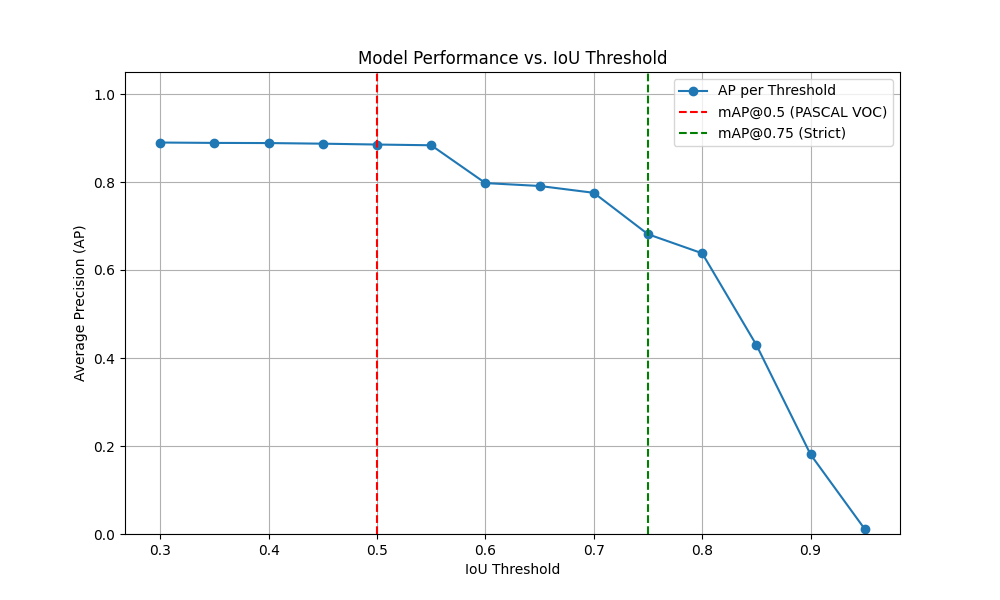

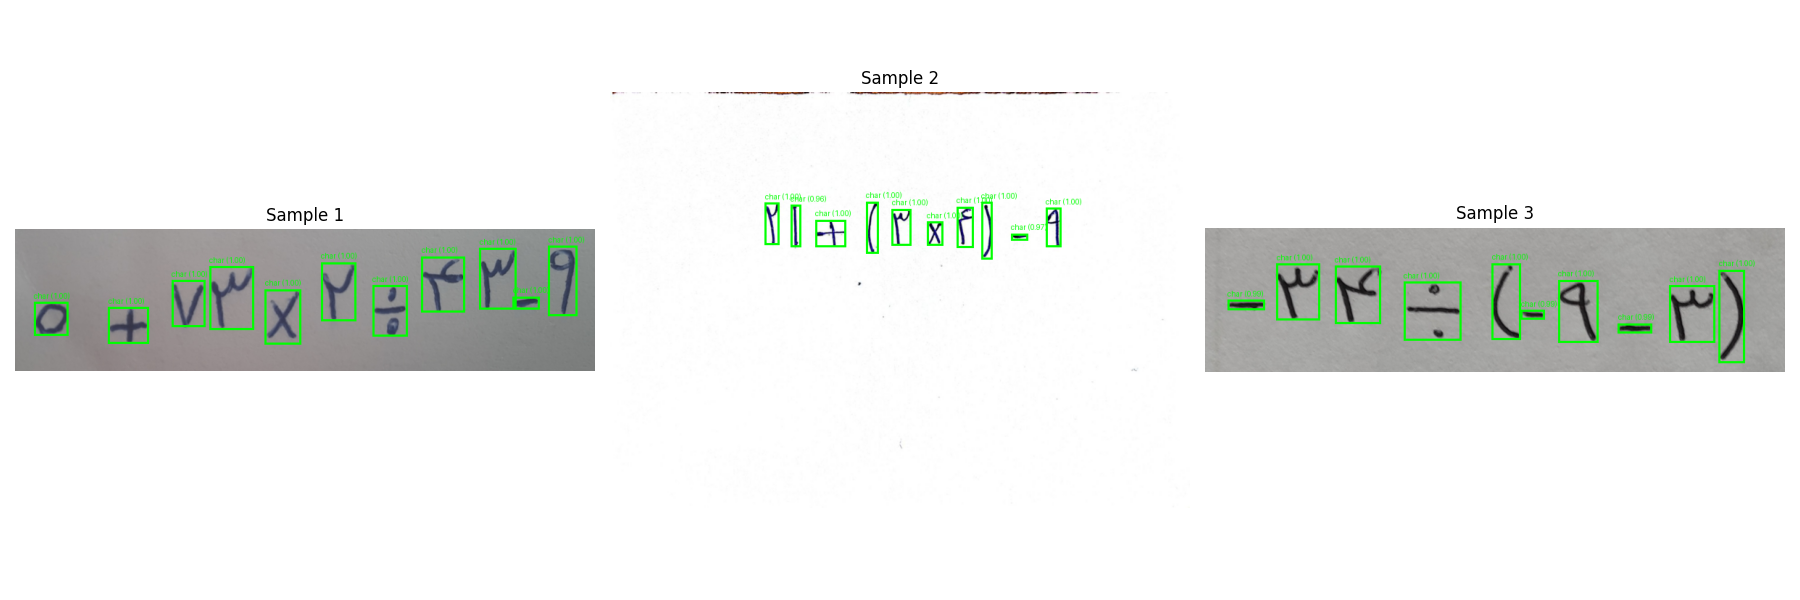

In [26]:
from IPython.display import Image, display
import glob

for img_path in glob.glob("/kaggle/working/proj/results/faster_rcnn/*.png"):
    display(Image(filename=img_path))


**Part 2 (5 random samples)**

Showing: /kaggle/working/proj/results/character_clustering/hog_gmm_db_k16_pcaauto/00_pca_scatter.png


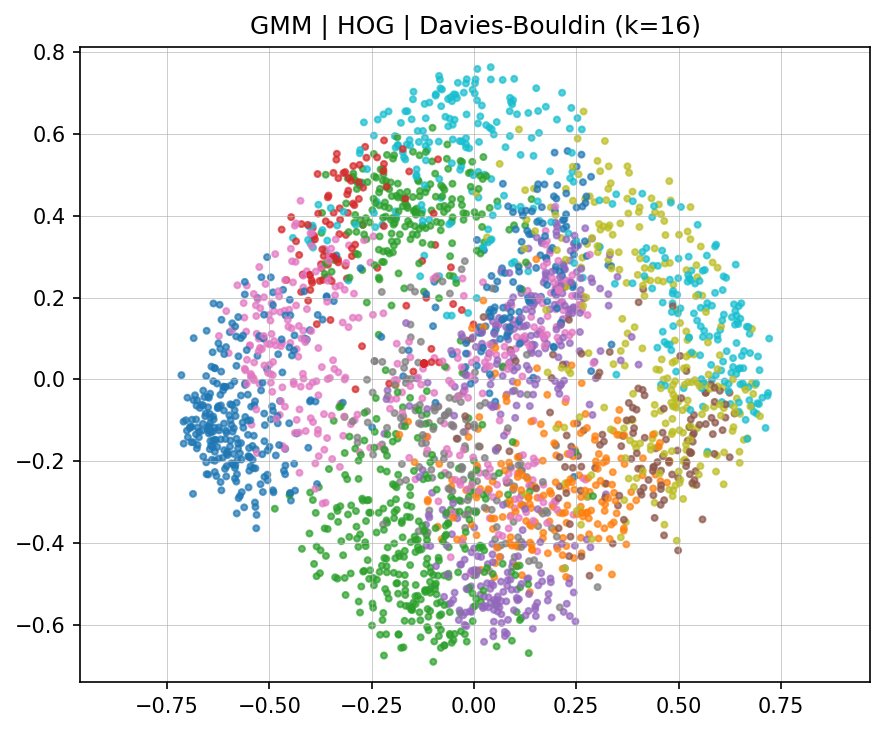

Showing: /kaggle/working/proj/results/character_clustering/hog_lbp_agglomerative_db_k16_pcaauto/00_pca_scatter.png


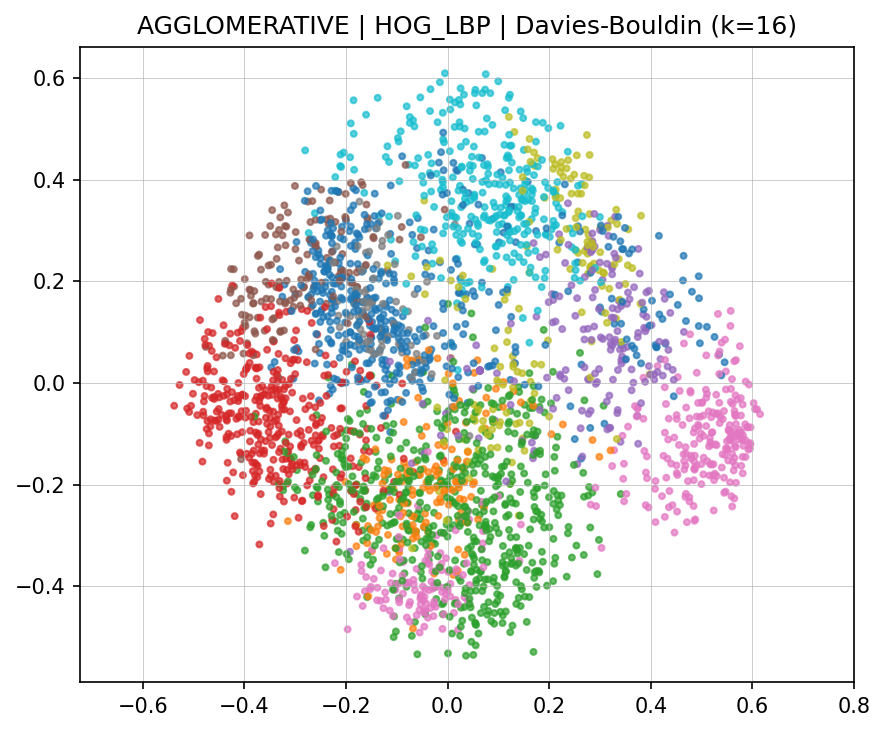

Showing: /kaggle/working/proj/results/character_clustering/hog_lbp_kmeans_silhouette_k16_pcaauto/00_pca_scatter.png


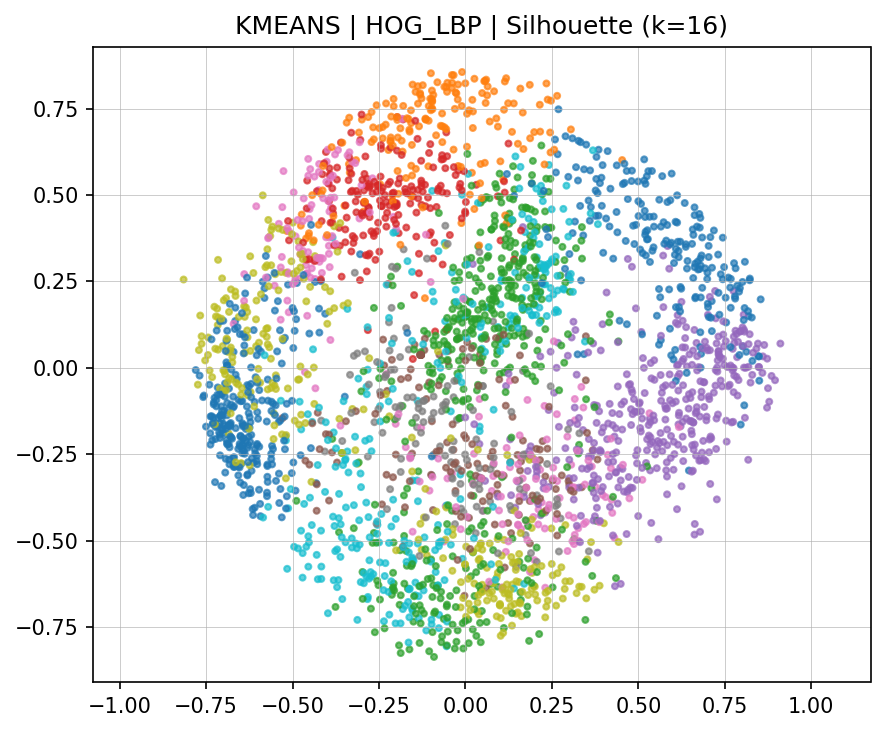

Showing: /kaggle/working/proj/results/character_clustering/hog_lbp_agglomerative_silhouette_k16_pcaauto/00_pca_scatter.png


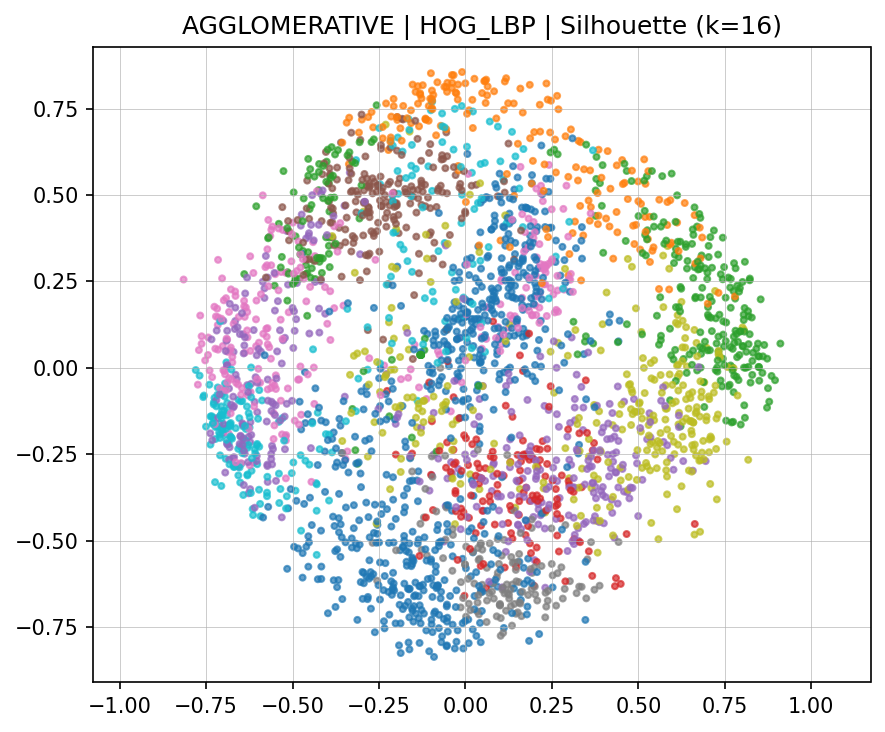

Showing: /kaggle/working/proj/results/character_clustering/raw_gmm_db_k16_pcaauto/00_pca_scatter.png


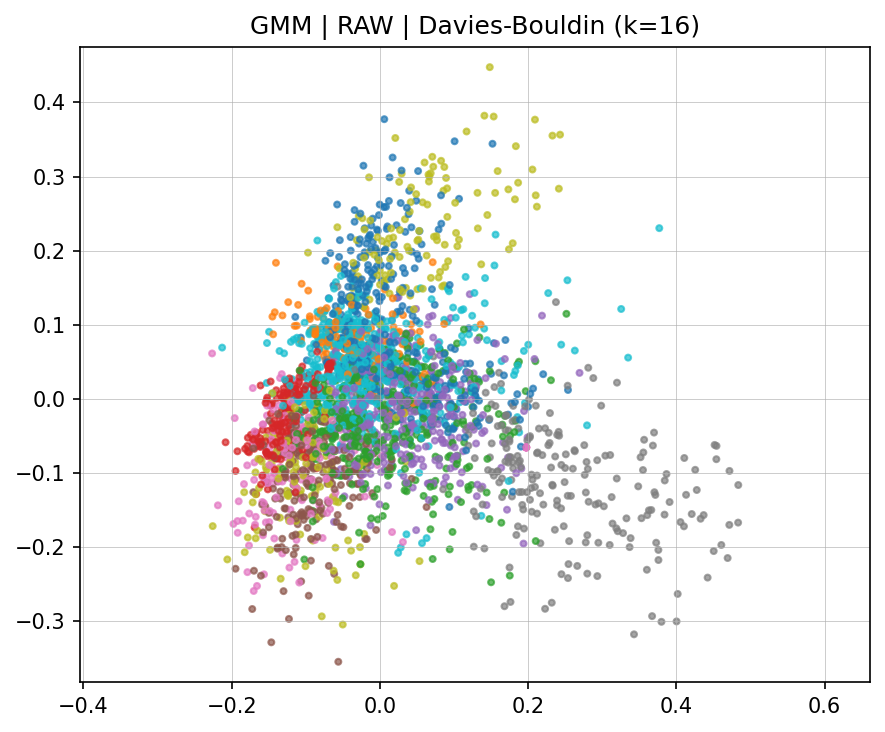

In [28]:
from IPython.display import Image, display
import glob
import os
import random

base_dir = "/kaggle/working/proj/results/character_clustering"

scatter_files = glob.glob(os.path.join(base_dir, "**", "00_pca_scatter.png"), recursive=True)

sample_files = random.sample(scatter_files, 5)

for img_path in sample_files:
    print(f"Showing: {img_path}")
    display(Image(filename=img_path))


**Part 3**

Showing: /kaggle/working/proj/results/fixmatch_char_pipeline/eval/confusion_matrix.png


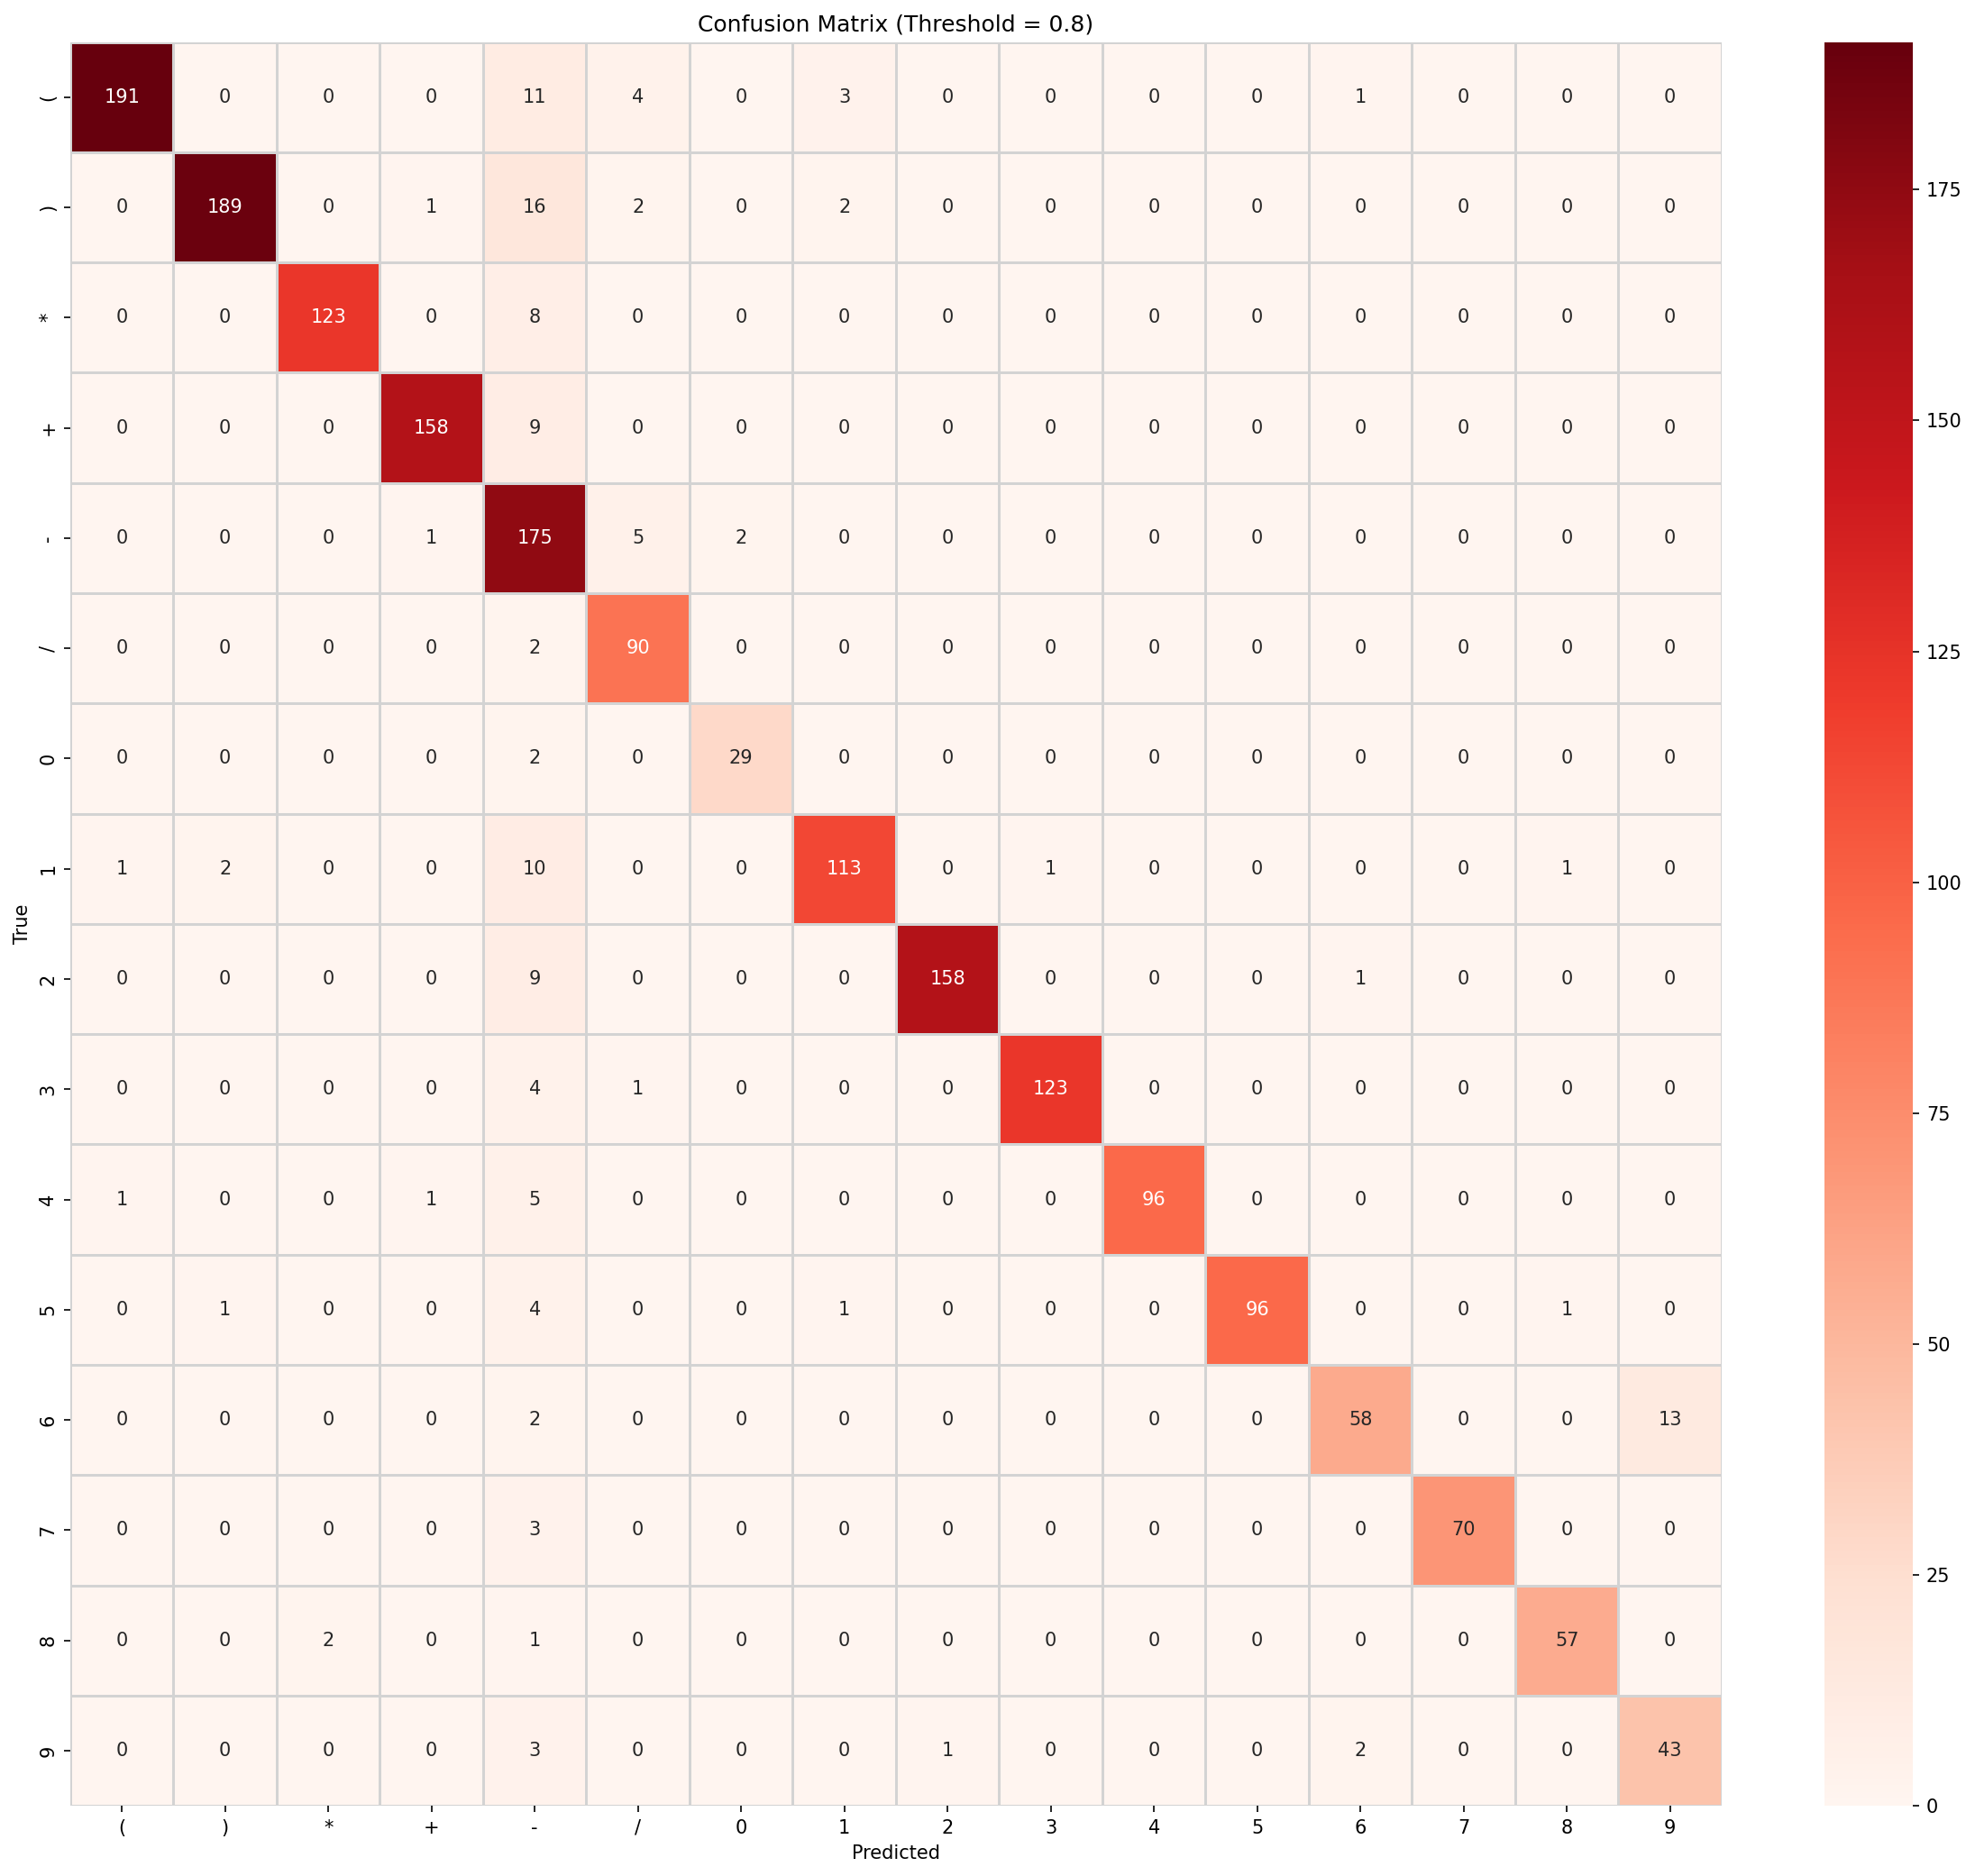

Showing: /kaggle/working/proj/results/fixmatch_char_pipeline/figs/random_labeled_sample.png


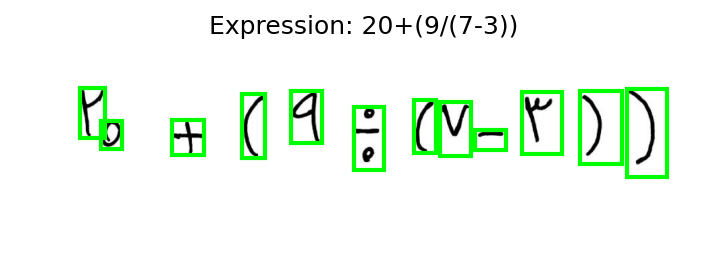

Showing: /kaggle/working/proj/results/fixmatch_char_pipeline/figs/validation_samples_(t_vs_p).png


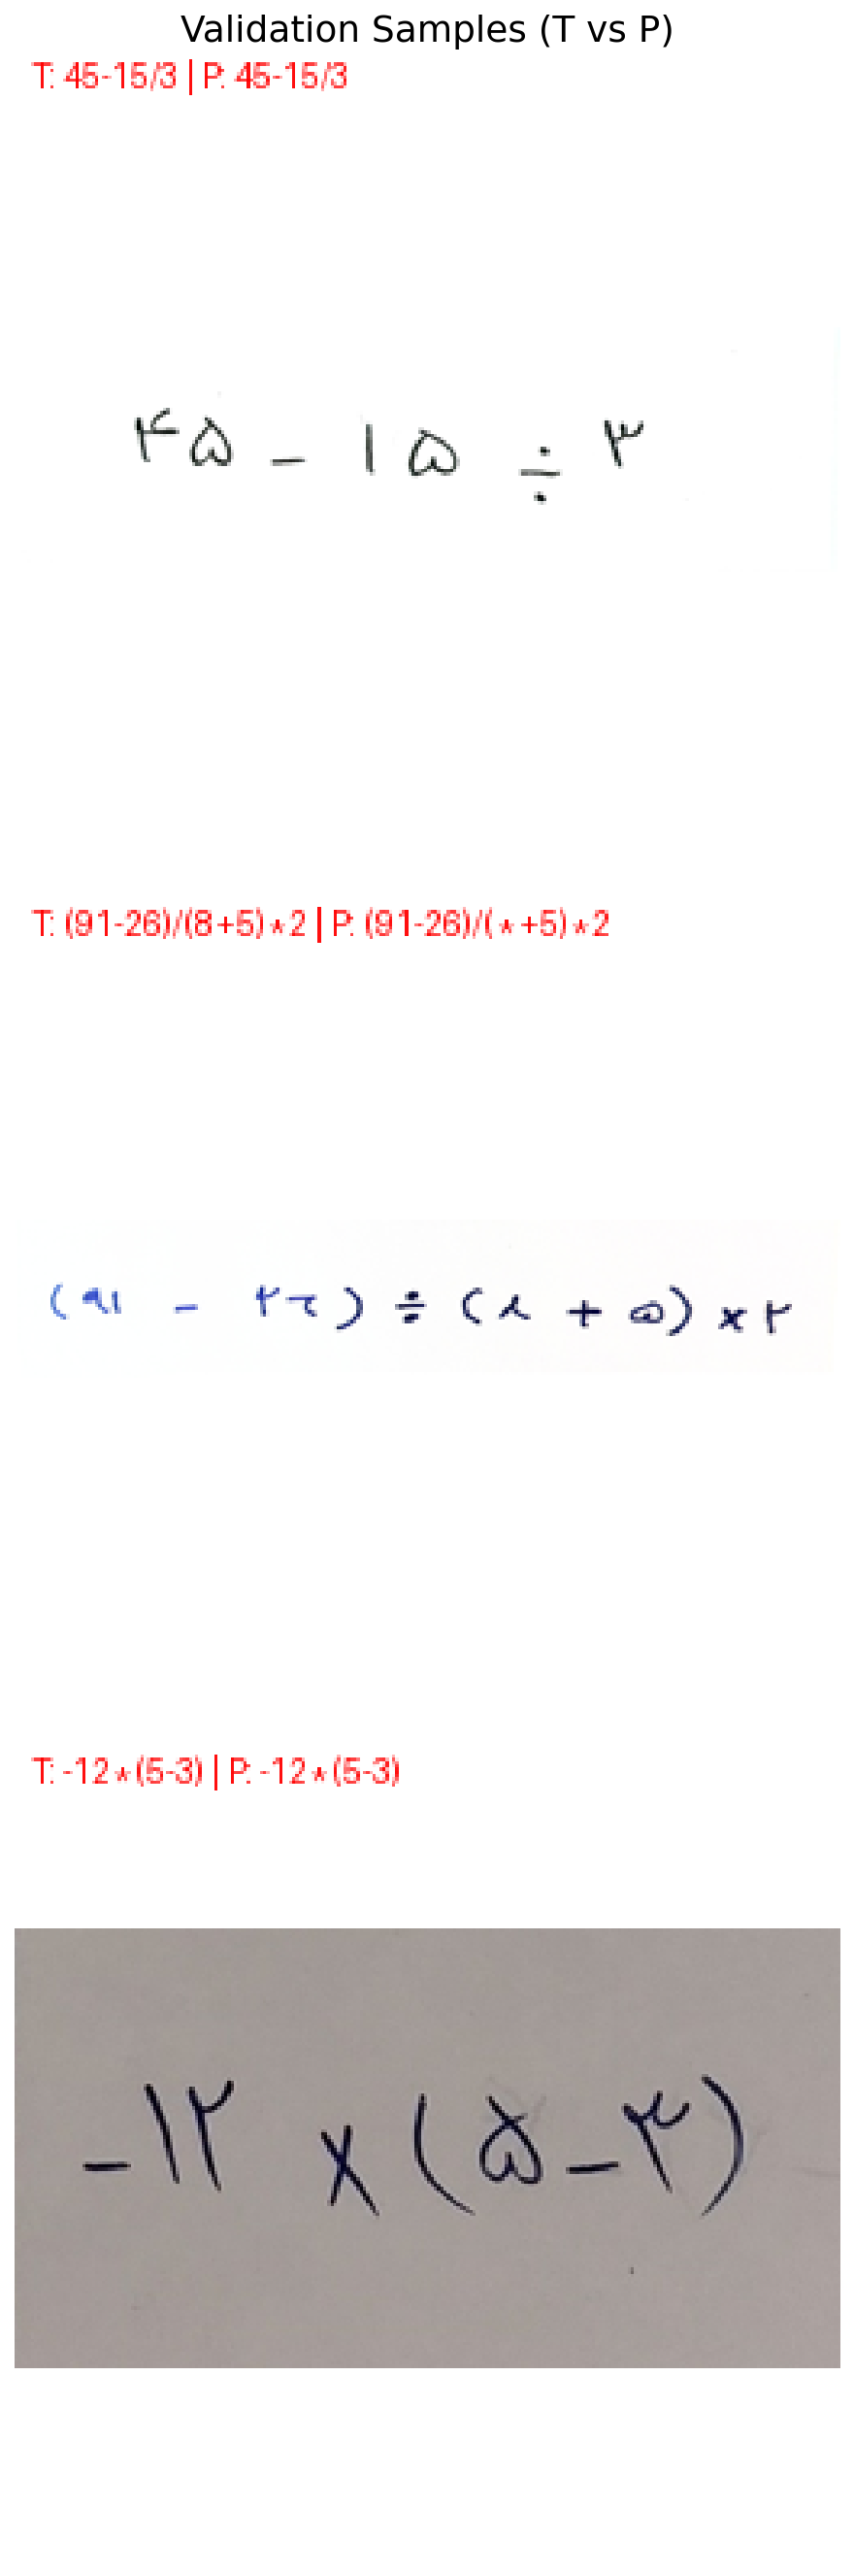

Showing: /kaggle/working/proj/results/fixmatch_char_pipeline/infer/random_test_predictions.png


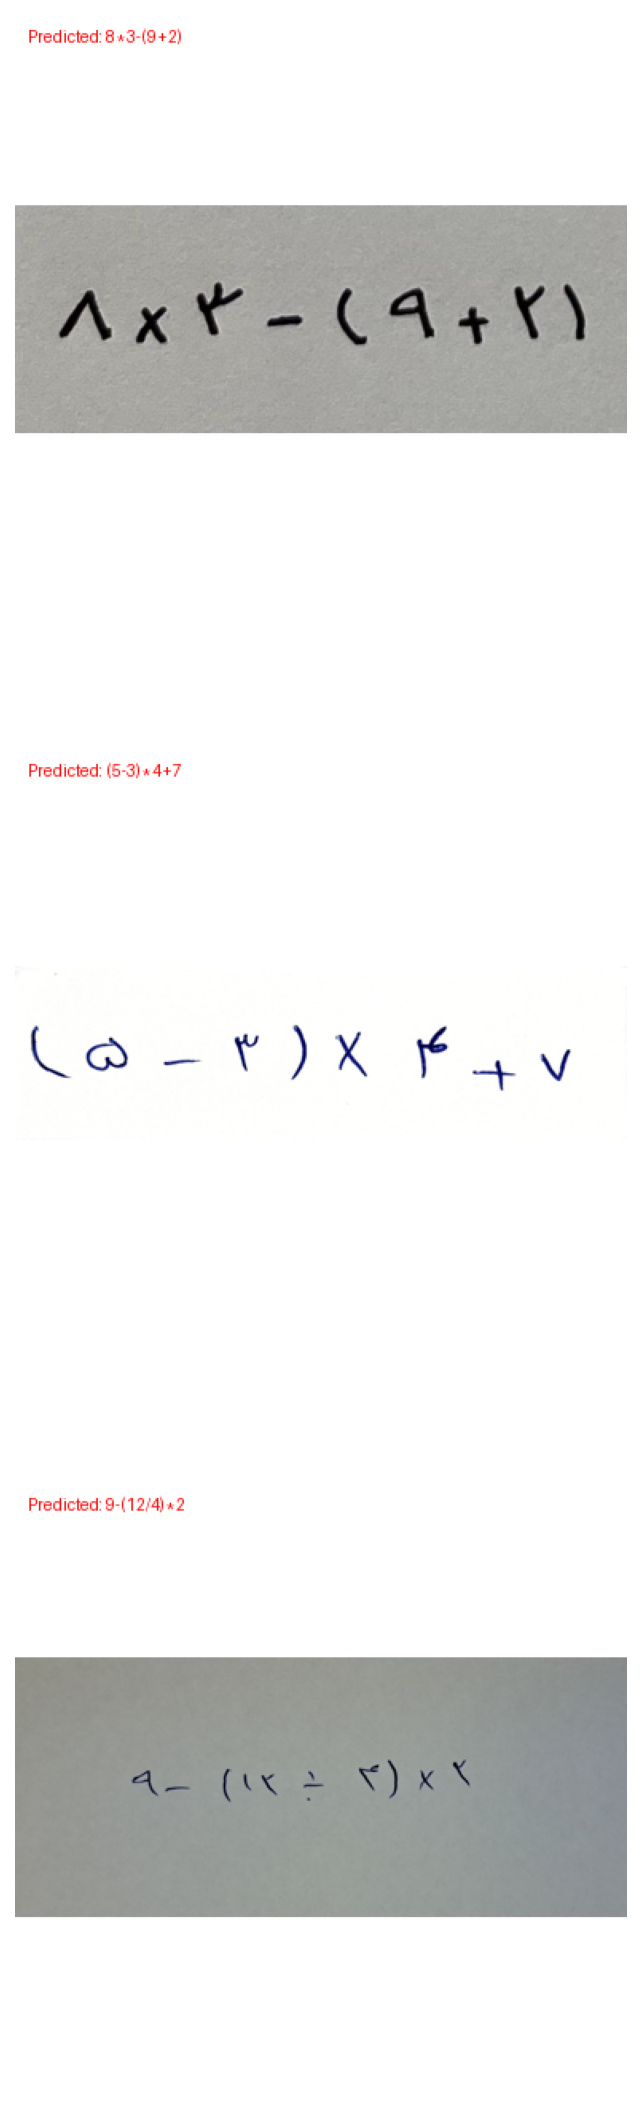

In [33]:
from IPython.display import Image, display
import glob
import os
import random

base_eval = "/kaggle/working/proj/results/fixmatch_char_pipeline/eval"
base_figs = "/kaggle/working/proj/results/fixmatch_char_pipeline/figs"
base_infer = "/kaggle/working/proj/results/fixmatch_char_pipeline/infer"


eval_img = os.path.join(base_eval, "confusion_matrix.png")  # می‌توانی هر فایل دیگر هم انتخاب کنی

figs_imgs = [
    os.path.join(base_figs, "random_labeled_sample.png"),
    os.path.join(base_figs, "validation_samples_(t_vs_p).png")
]

infer_img = os.path.join(base_infer, "random_test_predictions.png")

all_images = [eval_img] + figs_imgs + [infer_img]

for img_path in all_images:
    if os.path.exists(img_path):
        print(f"Showing: {img_path}")
        display(Image(filename=img_path))
    else:
        print(f"File not found: {img_path}")
